# Obtendo cotações históricas de ativos.

In [9]:
!pip install pandas
!pip install matplotlib
!pip install yfinance
#!pip install pandas_datareader
import pandas_datareader as web
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.2/3.0 MB 4.6 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 5.4 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 5.7 MB/s eta 0:00:01
     -------------------- ------------------- 1.5/3.0 MB 5.0 MB/s eta 0:00:01
     ----------------------------- ---------- 2.2/3.0 MB 5.9 MB/s eta 0:00:01
     -------------------------------------- - 2.8/3.0 MB 6.2 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 4.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started


In [11]:
#Obtendo a cotação
#df = web.DataReader('usdbrl=x', data_source='yahoo', start='2012-01-01', end='2024-12-31') 
#dataframe da cotação
#df
import yfinance as yf

# Obtendo a cotação do USD/BRL
df = yf.download('USDBRL=X', start='2012-01-01', end='2024-12-31')

# Mostrando o dataframe da cotação
print(df)

[*********************100%***********************]  1 of 1 completed

              Open    High       Low   Close  Adj Close  Volume
Date                                                           
2012-01-02  1.8599  1.8690  1.853500  1.8623     1.8623       0
2012-01-03  1.8577  1.8697  1.829400  1.8701     1.8701       0
2012-01-04  1.8346  1.8346  1.813100  1.8345     1.8345       0
2012-01-05  1.8197  1.8455  1.819700  1.8184     1.8184       0
2012-01-06  1.8377  1.8538  1.833300  1.8430     1.8430       0
...            ...     ...       ...     ...        ...     ...
2024-09-27  5.4367  5.4550  5.422800  5.4367     5.4367       0
2024-09-30  5.4332  5.4701  5.403800  5.4332     5.4332       0
2024-10-01  5.4485  5.4744  5.429400  5.4485     5.4485       0
2024-10-02  5.4240  5.4575  5.404969  5.4240     5.4240       0
2024-10-03  5.4441  5.5108  5.437900  5.4866     5.4866       0

[3324 rows x 6 columns]


In [13]:
# número de linhas e colunas no conjunto de dados
df.shape

(3324, 6)

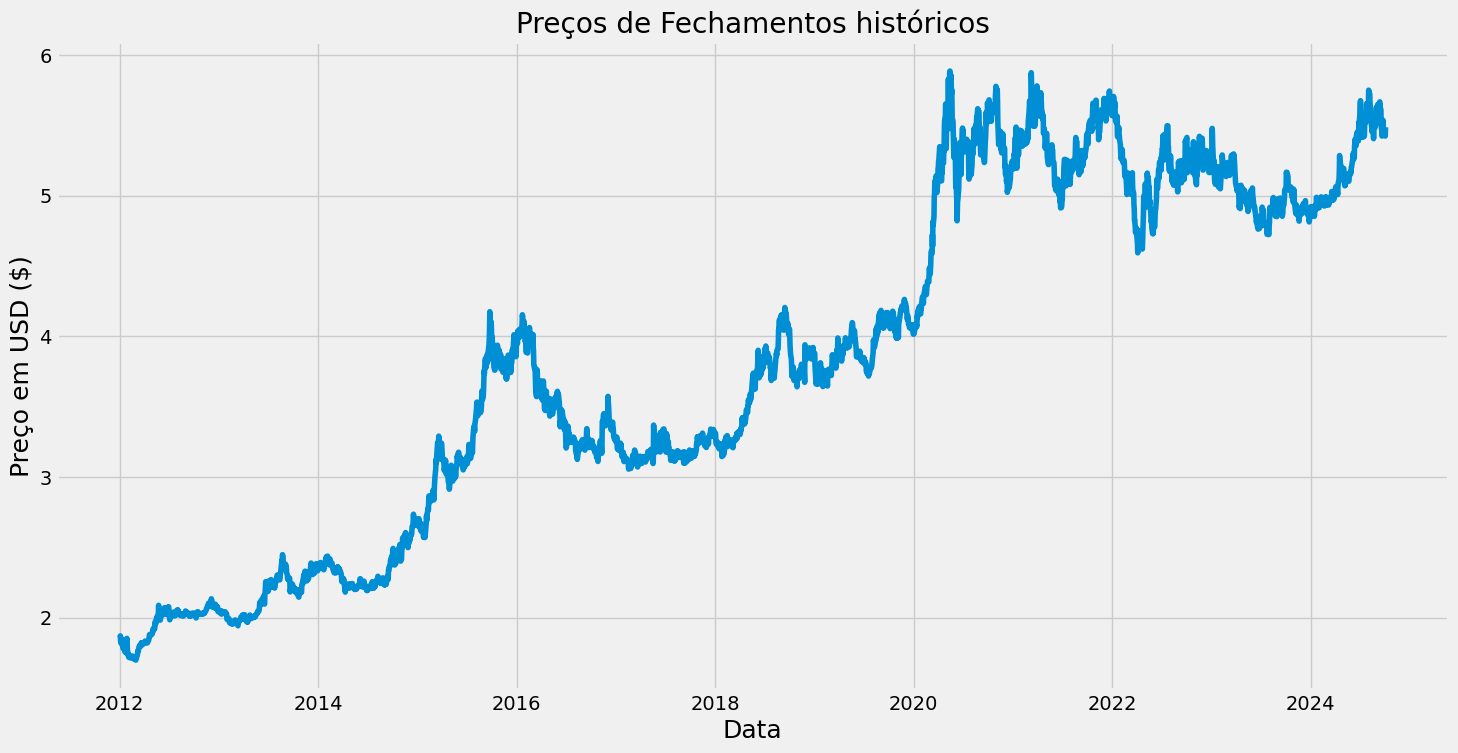

In [15]:
#Visualize o histórico do preço de fechamento
plt.figure(figsize=(16,8))
plt.title('Preços de Fechamentos históricos')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Preço em USD ($)',fontsize=18)
plt.show()

In [19]:
#Coeficiente de Hurst
!pip install hurst
from hurst import compute_Hc
# compute_Hc retornos
H, c, val = compute_Hc(df['Close'])
# Plot o grafíco
#axes = plt.subplots()[1]
#axes.plot(val[0], c*val[0]**H, color="blue")
#axes.scatter(val[0], val[1], color="red")
#axes.set_xscale('log')
#axes.set_yscale('log')
#axes.set_xlabel('Time interval')
#axes.set_ylabel('R/S ratio')
#axes.grid(True)
#plt.show()

# print do expoente de hurst
print("Hurst exponent = {:.4f}".format(H))
# Coeficiente de Hurst vai de 0 a 1
# Considerações abaixo:
# H = 0,5 - movimento browniano,
# H >0,5 até 1,0 - comportamento de tendência persistente
# 0 <H <0,5 - comportamento retorno a média.

Hurst exponent = 0.5676
